# A2.2 LDA y árboles de decisión
## Luis Enrique Garcia Gallegos
### **Matricula**: 649247
En esta actividad trabajarás con la misma base de datos que trabajaste en el [proyecto del primer parcial](P_P1_Regresion.html) y en la actividad [A2.1](Regresion_logistica_y_validacion_cruzada.html). Si por algún motivo tienes problemas y deseas cambiar de base de datos, puedes hacerlo, especificando claramente con qué base de datos estás trabajando ahora y de dónde la obtuviste. 
Desarrolla los siguientes puntos en una *Jupyter Notebook*, tratando, dentro de lo posible, que cada punto se trabaje en una celda distinta. Los comentarios en el código siempre son bienvenidos, de preferencia, aprovecha el *markdown* para generar cuadros de descripción que ayuden al lector a comprender el trabajo realizado. 
1. Importa los datos a tu ambiente de trabajo y separa los datos en entrenamiento y prueba, con una relación que consideres adecuada, manteniendo un balance de clases. Demuestra que se cumplió la condición imprimiendo datos relevantes en la consola. 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import random
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
BaseDeDatos=pd.read_csv('INE_SECCION_2020.csv')
datos=BaseDeDatos.drop(columns=['ID', 'DISTRITO', 'MUNICIPIO', 'SECCION', 'POBFEM', 'POBMAS', 'VPH_SINTIC', 'VPH_SINCIN', 'VPH_SINLTC', 'VPH_CVJ', 'VPH_SINRTV', 'VPH_SPMVPI', 'VPH_STVP', 'VPH_CEL', 'VPH_TELEF', 'VPH_INTER', 'VPH_PC', 'VPH_RADIO', 'VPH_TV', 'VPH_BICI', 'VPH_MOTO', 'VPH_AUTOM', 'VPH_HMICRO', 'VPH_LAVAD', 'VPH_REFRI', 'VPH_SNBIEN', 'VPH_NDACMM', 'VPH_DSADMA', 'VPH_NDEAED', 'VPH_C_SERV', 'VPH_NODREN', 'VPH_DRENAJ', 'VPH_LETR', 'VPH_EXCSA', 'VPH_CISTER', 'VPH_TINACO', 'VPH_AEASP', 'VPH_AGUAFV', 'VPH_AGUADV', 'VPH_S_ELEC', 'VPH_C_ELEC', 'VPH_3YMASC', 'VPH_2CUART', 'VPH_1CUART', 'VPH_2YMASD', 'VPH_1DOR', 'VPH_PISOTI', 'VPH_PISODT', 'PRO_OCUP_C', 'PROM_OCUP', 'OCUPVIVPAR', 'VIVPAR_UT', 'VIVPAR_DES', 'TVIVPARHAB', 'VIVPARH_CV', 'VIVPAR_HAB', 'TVIVPAR', 'TVIVHAB', 'VIVTOT', 'PHOGJEF_M', 'PHOGJEF_F', 'POBHOG', 'HOGJEF_M', 'HOGJEF_F', 'TOTHOG', 'P12YM_SEPA', 'P12YM_CASA', 'P12YM_SOLT', 'PAFIL_OTRA', 'PAFIL_IPRI', 'PDER_IMSSB', 'PDER_SEGP', 'PAFIL_PDOM', 'PDER_ISTEE', 'PDER_ISTE', 'PDER_SS', 'PDER_IMSS', 'PSINDER', 'PDESOCUP_M', 'PDESOCUP_F', 'PDESOCUP', 'POCUPADA_M', 'POCUPADA_F', 'POCUPADA', 'PE_INAC_M', 'PE_INAC_F', 'PE_INAC', 'PEA_M', 'PEA_F', 'PEA', 'GRAPROES_M', 'GRAPROES_F', 'GRAPROES', 'P18YM_PB_M', 'P18YM_PB_F', 'P15SEC_COM', 'P15SEC_COF', 'P15SEC_INM', 'P15SEC_INF', 'P15PRI_COM', 'P15PRI_COF', 'P15PRI_INM', 'P15PRI_INF', 'P15YM_SE_M', 'P15YM_SE_F', 'P15YM_AN_F', 'P15YM_AN_M', 'P8A14AN_M', 'P8A14AN_F', 'P18A24A_M', 'P18A24A_F', 'P15A17A_F', 'P15A17A_M', 'P12A14NOAM', 'P12A14NOAF', 'P6A11_NOAM', 'P6A11_NOAF', 'P3A5_NOA_M', 'P3A5_NOA_F', 'PSIND_LIM', 'PCLIM_PMEN', 'PCLIM_RE_C', 'PCLIM_MOT2', 'PCLIM_OAUD', 'PCLIM_HACO', 'PCLIM_VIS', 'PCLIM_CSB', 'PCON_LIMI', 'PCDISC_MEN', 'PCDISC_M_A', 'PCDISC_AUD', 'PCDISC_LEN', 'PCDISC_VIS', 'PCDISC_MOT', 'PCON_DISC', 'POB_AFRO_M', 'POB_AFRO_F', 'POB_AFRO', 'PHOG_IND', 'P5_HLI_HE', 'P5_HLI_NHE', 'P5_HLI', 'P3HLI_HE_M', 'P3HLI_HE_F', 'P3HLI_HE', 'P3HLINHE_M', 'P3HLINHE_F', 'P3HLINHE', 'P3YM_HLI_M', 'P3YM_HLI_F', 'P3YM_HLI', 'PRESOE15_M', 'PRESOE15', 'PRESOE15_F', 'PRES2015_M', 'PRES2015_F', 'PRES2015', 'PNACOE_M', 'PNACOE_F', 'PNACOE', 'PNACENT_M', 'PNACENT_F', 'PNACENT', 'PROM_HNV', 'POB_EDADNE', 'POB65_MAS', 'POB15_64', 'POB0_14', 'REL_H_M', 'P_60YMAS_M', 'P_60YMAS_F', 'P_60YMAS', 'P_15A49_F', 'P_18A24_M', 'P_18A24_F', 'P_18A24', 'P_15A17_M', 'P_15A17_F', 'P_15A17', 'P_12A14_M', 'P_12A14_F', 'P_12A14', 'P_8A14_M', 'P_8A14_F', 'P_8A14', 'P_6A11_M', 'P_6A11_F', 'P_6A11', 'P_3A5_M', 'P_3A5_F', 'P_3A5', 'P_18YMAS_M', 'P_18YMAS_F', 'P_18YMAS', 'P_15YMAS_M', 'P_15YMAS_F', 'P_15YMAS', 'P_12YMAS_M', 'P_12YMAS_F', 'P_12YMAS', 'P_5YMAS_M', 'P_5YMAS_F', 'P_5YMAS', 'P_3YMAS_M', 'P_3YMAS_F', 'P_3YMAS', 'P_0A17', 'P_0A2_M', 'P_0A2_F'])
for i in range(32, 1, -1):
    name='ENTIDAD'+str(i)
    datos[name]=datos['ENTIDAD']//i
    existe=datos[name]*i
    datos['ENTIDAD']=datos['ENTIDAD']-existe
datos['TIPO']=datos['TIPO']-2
datos=datos.drop('ENTIDAD', axis=1)
X=datos.drop('TIPO', axis=1)
Y=datos['TIPO']
random.seed(0)
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, stratify=Y)
print("Datos de entrenamiento: ", x_train.shape, "\tDatos de prueba: ", x_test.shape, "\n\tTotal de datos: ", (x_train.shape[0]+x_test.shape[0]))
print("\tSalida de entrenamiento (porcentajes):\n", round(100*(y_train.value_counts())/x_train.shape[0], 2), "\n\n\tSalida de prueba (porcentajes):\n", round(100*(y_test.value_counts())/y_test.shape[0], 2))

Datos de entrenamiento:  (55044, 46) 	Datos de prueba:  (13762, 46) 
	Total de datos:  68806
	Salida de entrenamiento (porcentajes):
 TIPO
0    63.68
2    27.04
1     9.28
Name: count, dtype: float64 

	Salida de prueba (porcentajes):
 TIPO
0    63.68
2    27.04
1     9.28
Name: count, dtype: float64


Se realizo la limpieza de datos al igual que en los trabajos pasados, con el fin fe realizar un modelo que prediga clases como en el trabajo pasado, sin embargo esta vez usaremos otro modelo, ademas de evitar el desbalance de datos mediante la adición de `stratify=Y`, la cual hará que las particiones tengan misma proporción de datos; igualmente se uso una semilla.

2. Corre una regresión logística simple con la función `GLM` de `statsmodels` con todas tus variables de entrada e imprime el resumen del modelo en consola. Indica cuáles son las **2 variables** más relevantes para este estudio y selecciónalas, eliminando todas las demás variables de tus datos de entrenamiento y prueba. 

In [ ]:
x_train_fit=sm.add_constant(x_train)
modeloGLM=sm.GLM(y_train, x_train_fit)
resultadoGLM=modeloGLM.fit()
print(resultadoGLM.summary())
pValuesGLM=resultadoGLM.pvalues
print("\nValores P>|z| de cada variable (menor a mayor):\n", pValuesGLM.sort_values())
x_train=x_train[['P15PRI_IN', 'P15PRI_CO']]
x_test=x_test[['P15PRI_IN', 'P15PRI_CO']]

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   TIPO   No. Observations:                55044
Model:                            GLM   Df Residuals:                    54997
Model Family:                Gaussian   Df Model:                           46
Link Function:               Identity   Scale:                         0.52575
Method:                          IRLS   Log-Likelihood:                -60386.
Date:                Tue, 18 Mar 2025   Deviance:                       28915.
Time:                        10:14:07   Pearson chi2:                 2.89e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3756
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3657      0.033     11.227      0.0

Para poder escoger las variables más relevantes se uso `summary()` para ver cuales variables tienen un *p-value* de menor valor, como más de una variables tienen un *p-value* menor de **0.0001** se imprimio los *p-values* de cada variable (menor a mayor), con el fin de escoger las **2 variables** más relevantes, siendo `P15PRI_IN` y `P15PRI_CO`.

3. Genera un modelo usando la metodología de linear discriminant analysis. Visualiza la función discriminante con una gráfica de variable 1 vs variable 2, donde cada observación tenga algo que la distinga dependiendo de su clase (por ejemplo, distinto color, distinto marcador, etc.) 

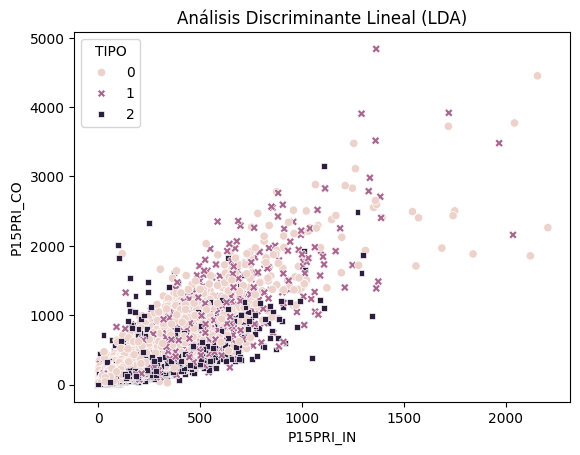

In [15]:
modeloLDA=LinearDiscriminantAnalysis()
resultadoGLDA=modeloLDA.fit(x_train, y_train)
sns.scatterplot(x=x_train['P15PRI_IN'], y=x_train['P15PRI_CO'], hue=y_train, style=y_train)
plt.title('Análisis Discriminante Lineal (LDA)')
plt.xlabel('P15PRI_IN')
plt.ylabel('P15PRI_CO')
plt.legend(title="TIPO")
plt.show()

Chat-gpt proporciono parte del código el cual nos permitirá observar como se comportan nuestros datos según `LinearDiscriminantAnalysis()`, esto con el fin de poder general un árbol de decisiones y el poder las ramas que se formaran en nuestro modelo.

4. Genera un modelo usando la metodología de árboles de decisión. Deberás podar el árbol, habiendo seleccionado primero un valor óptimo de $𝛼$ mediante una metodología de LOOCV. Visualiza tanto el árbol resultante, como la partición en una gráfica de variable 1 vs variable 2, donde cada observación tenga algo que la distinga dependiendo de su clase. 

In [16]:
arbol_base=DecisionTreeClassifier(random_state=42)
arbol_base.fit(x_train, y_train)
param_grid={'ccp_alpha': np.linspace(0, 0.1, 20)}
loo=LeaveOneOut()
grid_search=GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=loo, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_alpha=grid_search.best_params_['ccp_alpha']
print(f"Mejor α encontrado: {best_alpha}")
arbol_podado = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
arbol_podado.fit(x_train, y_train)
plt.figure(figsize=(16, 10))
plot_tree(arbol_podado, filled=True, feature_names=['P15PRI_IN', 'P15PRI_CO'], class_names=np.unique(y_train).astype(str))
plt.title("Árbol de Decisión")
plt.show()

KeyboardInterrupt: 

Este código fue proporcionado por Chat-gpt.

5. Calcula, para ambos modelos, todas las métricas revisadas en clase en los datos de prueba. Indica qué opinas sobre los resultados, especificando si crees que uno de los dos modelos es mejor para esta tarea específica.

**Firma de Honor:** Doy mi palabra que he realizado esta actividad con integridad académica